In [109]:
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

modelTree = DecisionTreeRegressor(max_depth=10)

df = pd.read_csv('./housing.csv')

datos = df.dropna()

In [110]:
dummies = pd.get_dummies(datos['ocean_proximity'], dtype=int)
datos = pd.concat([datos, dummies], axis=1)

datos.drop('ocean_proximity', axis=1, inplace=True)
datos

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


In [111]:
datos['rooms_per_household'] = datos['total_rooms'] / datos['households']
datos['bedrooms_per_household'] = datos['total_bedrooms'] / datos['households']
datos['population_per_household'] = datos['population'] / datos['households']
datos['bedrooms_per_room'] = datos['total_bedrooms'] / datos['total_rooms']
datos['room_ratio'] = datos['total_rooms'] / datos['total_bedrooms']
datos['income_per_person'] = datos['median_income'] / datos['population']
datos['age_per_person'] = datos['housing_median_age'] / datos['population']
datos['income_per_household'] = datos['median_income'] / datos['households']
datos['income_per_room'] = datos['median_income'] / datos['total_rooms']
datos['income_per_bedroom'] = datos['median_income'] / datos['total_bedrooms']
datos['age_per_household'] = datos['housing_median_age'] / datos['households']
datos['age_per_room'] = datos['housing_median_age'] / datos['total_rooms']
datos['age_per_bedroom'] = datos['housing_median_age'] / datos['total_bedrooms']
datos['population_per_room'] = datos['population'] / datos['total_rooms']
datos['population_per_bedroom'] = datos['population'] / datos['total_bedrooms']
datos['population_per_income'] = datos['population'] / datos['median_income']

datos['casa_vieja'] = (datos['housing_median_age'] > 50).astype(int)
datos['casa_cara'] = (datos['median_house_value'] > 500000).astype(int)
datos['ingreso_maximo'] = (datos['median_income'] < 15).astype(int)

In [112]:
X = datos.drop('median_house_value', axis=1)
y = datos['median_house_value']

In [113]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

In [114]:
modelTree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10)

In [115]:
predicciones = modelTree.predict(X_test)


In [116]:
modelTree.score(X_test, y_test)

0.7756382165150578

[Text(0.5625, 0.9, 'casa_cara <= 0.5\n13480941681.457\n16346\n207251.529'),
 Text(0.5, 0.7, 'median_income <= 4.071\n9597671613.427\n15557\n192404.236'),
 Text(0.53125, 0.8, 'True  '),
 Text(0.25, 0.5, 'INLAND <= 0.5\n6179328754.815\n10158\n154894.063'),
 Text(0.125, 0.3, 'population_per_household <= 2.567\n6031335332.21\n6107\n188940.478'),
 Text(0.0625, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.3, 'median_income <= 2.584\n2020614374.423\n4051\n103568.106'),
 Text(0.3125, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.1, '\n  (...)  \n'),
 Text(0.75, 0.5, 'median_income <= 5.592\n8401236015.598\n5399\n262978.107'),
 Text(0.625, 0.3, 'INLAND <= 0.5\n6600229987.411\n3593\n233456.972'),
 Text(0.5625, 0.1, '\n  (...)  \n'),
 Text(0.6875, 0.1, '\n  (...)  \n'),
 Text(0.875, 0.3, 'median_income <= 6.566\n6801062478.698\n1806\n321709.801'),
 Text(0.8125, 0.1, '\n  (...)  \n'),
 Text(0.9375, 0.1, '\n  (...)  \n'),
 Text(0.625, 0.7, '0.0\n789\n500001.0'),
 Text(0.59375

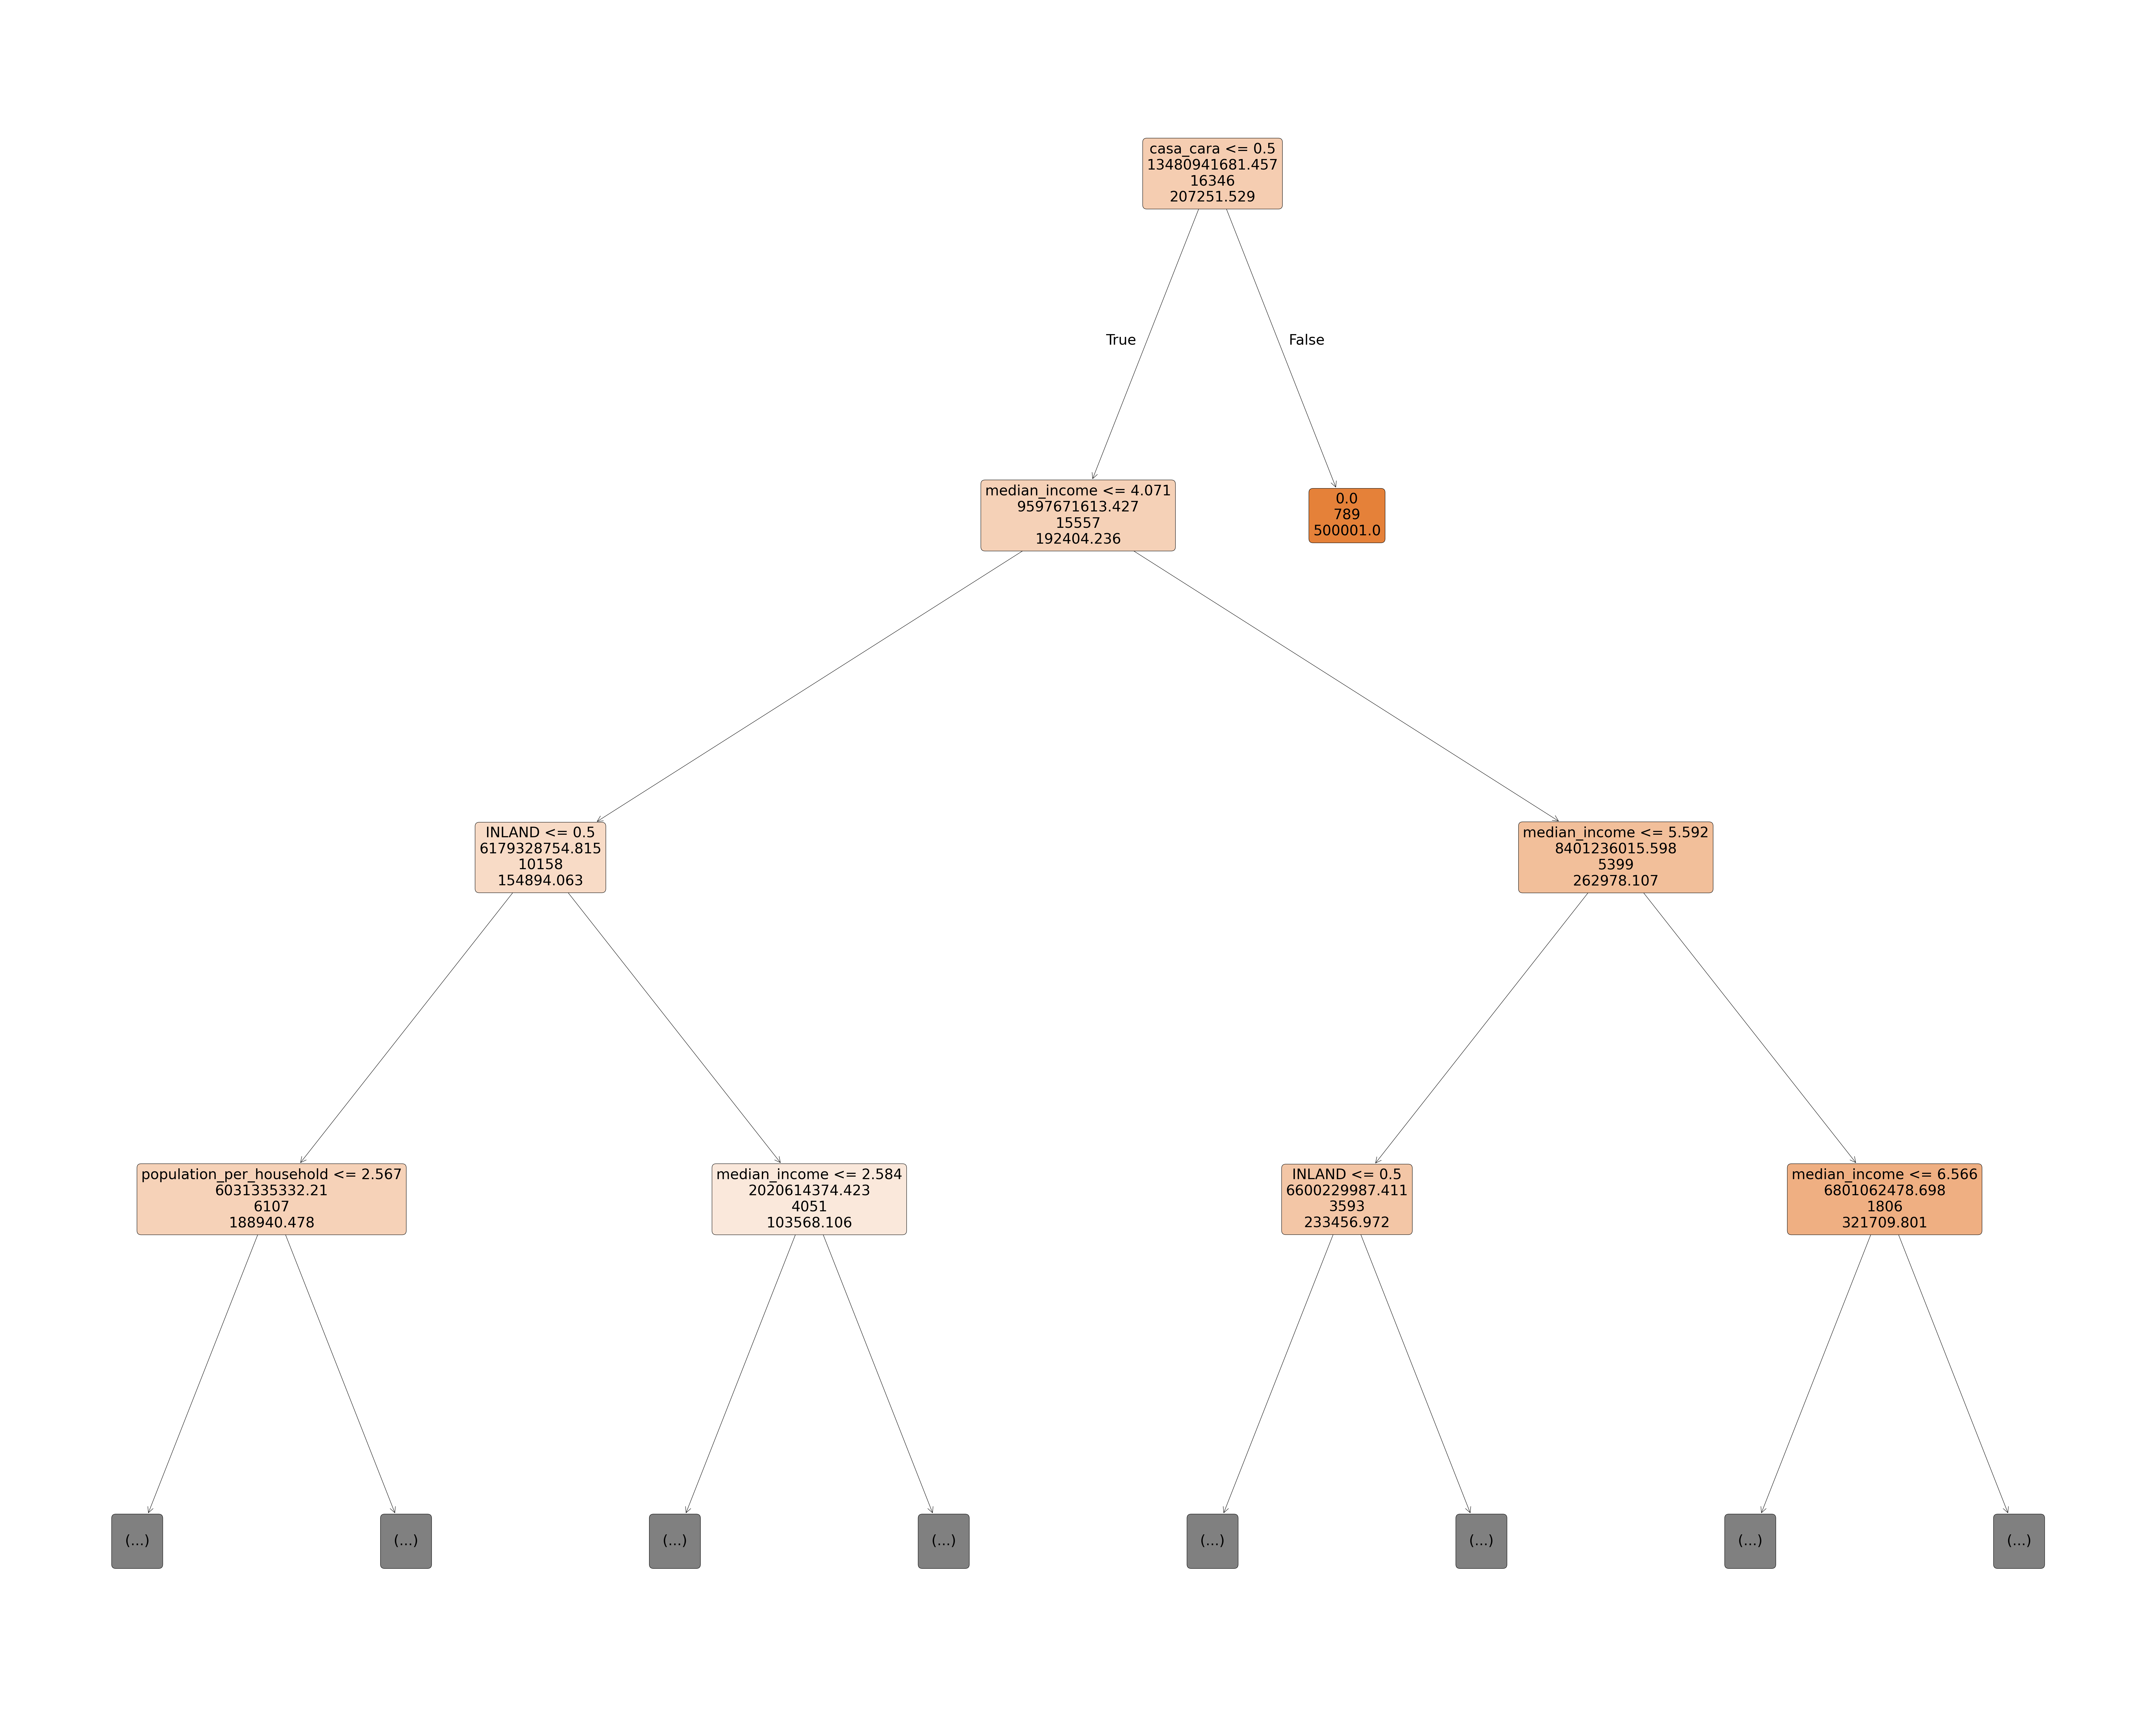

In [117]:
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

plt.figure(figsize=(100,80))
plot_tree(
    modelTree,
    feature_names=X_train.columns,
    max_depth=3,
    filled=True,
    label='none',
    rounded=True
)